# TTA static regression with a mixed feature obtained via PCA on time and relative surface

We want to separate the data points that have the same relative surface, but not the same elapsed time. Since surface and time are correlated, we try to create a mixed feature from them, that would be more informative than the single features, or maybe even than both when combined in a multivariate linear model.

In [16]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns
from skimage import measure # to get contours from masks
import sklearn

import napari

%matplotlib qt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme()

## Loading Data

In [17]:
os.chdir("D:\Documents\STAGE\Anaphase")
data = pd.read_csv("Analysis_BF_f0001-1-100.1.csv", sep=";", comment="#", index_col="idx")
data = data[data["time_to_anaphase"] >= 0]

print(data.shape)
data.head()

(495, 13)


,frame,time,mom_x,mom_y,daugh_x,daugh_y,mom_surf,daugh_surf,relat_surf,anaphase,anaphase_int,time_to_anaphase,cum_relat_surf
idx,,,,,,,,,,,,,
0,0,0,463.509804,225.369863,-1.000000,-1.000000,229.730504,0.000000,0.000000,False,0,36,0.000000
0,1,6,463.481911,225.084507,460.542099,238.588235,227.730488,9.534260,0.041866,False,0,30,0.020842
0,2,12,460.345420,225.602740,456.110886,239.965517,229.730504,36.406857,0.158476,False,0,24,0.066853
0,3,18,460.578297,225.698630,455.691877,240.914286,224.730504,51.553944,0.229403,False,0,18,0.106912
0,4,24,461.524165,225.985915,456.054041,241.146341,228.446179,68.701031,0.300732,False,0,12,0.145739


## Combine features using sums or products

(445, 1) (50, 1) (445, 1) (50, 1)


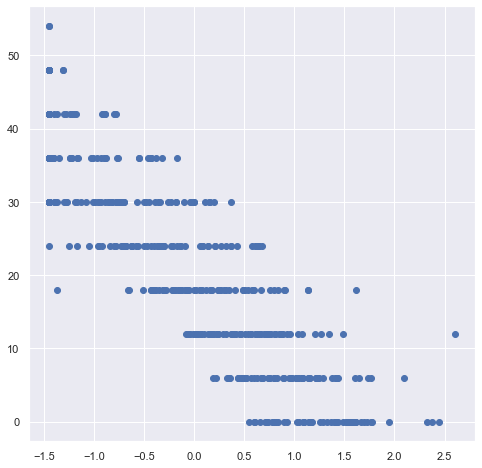

In [20]:
# prepare the training set
from sklearn.model_selection import train_test_split

# features = ["relat_surf", "time"]
# for f in features:
#     data[f] = (data[f] - data[f].mean()) / data[f].std()

combine = lambda f1, f2: f1 * 10 + f2

features = ["surf_x_time"]
data["surf_x_time"] = combine(data["relat_surf"], data["time"])
data["surf_x_time"] = (data["surf_x_time"] - data["surf_x_time"].mean()) / data["surf_x_time"].std()

X, y = data[features].values.reshape(-1, 1), data["time_to_anaphase"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_train, y_train, c='b', label="Train set")

## Combine features using PCA

In [18]:
# prepare the training set
from sklearn.model_selection import train_test_split

features = ["relat_surf", "time"]

for feature in features:
    data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()

X, y = data[features], data["time_to_anaphase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(445, 2) (50, 2) (445,) (50,)


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.components_)

[0.95073833 0.04926167]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
